In [1]:
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Define the file path and image dimensions
file_path = 'images_arabic'
img_width, img_height = 64, 64

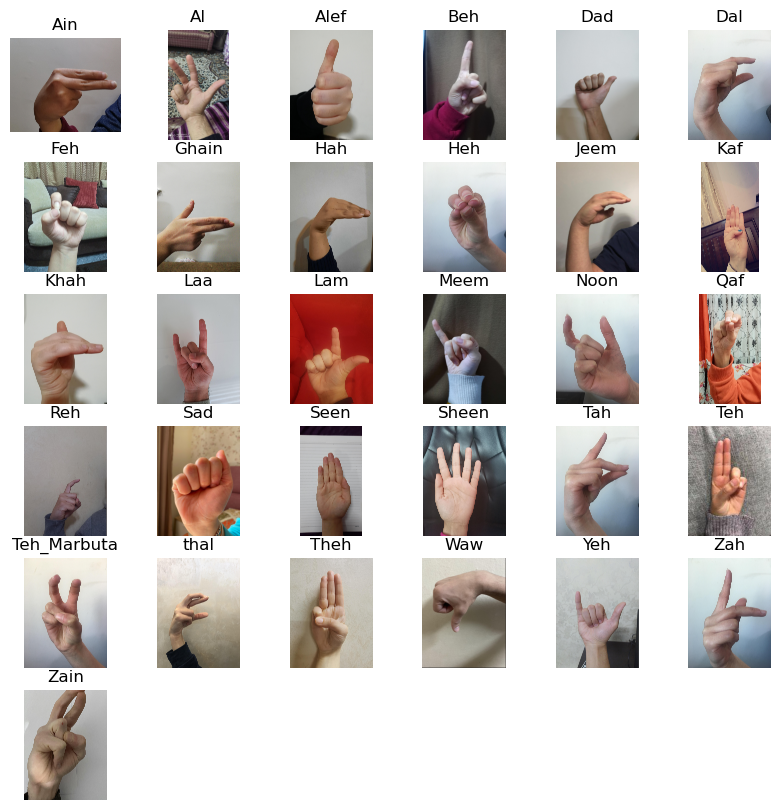

In [121]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images_from_dirs(base_dir):
    # Assuming each directory in the base directory is a label
    labels = os.listdir(base_dir)

    fig = plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        label_dir = os.path.join(base_dir, label)
        image_name = os.listdir(label_dir)[0]  # Use the first image in each directory
        image_path = os.path.join(label_dir, image_name)
        image = Image.open(image_path)

        ax = fig.add_subplot(6, 6, i+1)
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')

    plt.show()

# Replace 'base_dir' with your actual base directory
visualize_images_from_dirs('images_split/training_dataset')

In [6]:
def load_images(file_path, img_width, img_height):
    img_arrays = []
    labels = []
    for label in os.listdir(file_path):
        label_path = os.path.join(file_path, label)
        for img_file in os.listdir(label_path):
            # Load the image and resize it 
            img_array = cv2.imread(os.path.join(label_path, img_file))
            if img_array is None:
                continue
            img_array = cv2.resize(img_array, (img_width, img_height))
            # Convert the image to grayscale
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            img_arrays.append(img_array)
            labels.append(label)
            # print progress for every 500 images
            if len(img_arrays) % 500 == 0:
                print('Loaded {} images'.format(len(img_arrays)))
                break
    
    # Reshape the input data to create a 4D array with shape (num_samples, img_width, img_height, 1)
    img_arrays = np.array(img_arrays).reshape((-1, img_width, img_height, 1))
    
    return img_arrays, np.array(labels)


In [21]:
def prepare_data(img_arrays, labels):
    # Normalize the pixel values
    img_arrays = img_arrays.astype('float32') / 255.0

    # merge classes 
    labels = labels.tolist()
    for e in labels:
        e = e.split('_')[0]
    labels = np.array(labels)

    # convert the labels to integer format
    label_dict = {label: i for i, label in enumerate(np.unique(labels))}
    labels_int = [label_dict[label] for label in labels]

    # convert the labels to one-hot encoded format
    labels_one_hot = to_categorical(labels_int)

    # Add a new axis to the input data to create a 3D array with shape (num_samples, img_width, img_height, 1)
    img_arrays = np.expand_dims(img_arrays, axis=-1)

    return img_arrays, labels_one_hot


In [8]:
import os
import random
import shutil

def split_dataset(input_dir, output_dir, split_ratio):
    # Créer les dossiers de sortie
    train_dir = os.path.join(output_dir, 'training_dataset')
    val_dir = os.path.join(output_dir, 'validation_dataset')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Parcourir les sous-dossiers du dossier d'entrée
    for label_dir in os.listdir(input_dir):
        label_path = os.path.join(input_dir, label_dir)
        
        # Ignorer les fichiers qui ne sont pas des dossiers
        if not os.path.isdir(label_path):
            continue
        
        # Créer les sous-dossiers de sortie pour chaque label
        train_label_dir = os.path.join(train_dir, label_dir)
        val_label_dir = os.path.join(val_dir, label_dir)
        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)
        
        # Lister les fichiers images dans le sous-dossier
        images = os.listdir(label_path)
        random.shuffle(images)  # Mélanger aléatoirement les images
        
        # Calculer le nombre d'images pour l'ensemble de validation
        num_val_images = int(len(images) * split_ratio)
        
        # Copier les fichiers images dans les sous-dossiers appropriés
        for i, image in enumerate(images):
            src_path = os.path.join(label_path, image)
            if i < num_val_images:
                dest_path = os.path.join(val_label_dir, image)
            else:
                dest_path = os.path.join(train_label_dir, image)
            shutil.copy(src_path, dest_path)
            print(f"Copying {src_path} to {dest_path}")
    
    print("Dataset split completed successfully.")

# Utilisation de la fonction pour diviser le dossier
input_folder = 'images_arabic'
output_folder = 'images_split'
split_ratio = 0.2  # Ratio d'images pour l'ensemble de validation (par exemple, 0.2 = 20%)

split_dataset(input_folder, output_folder, split_ratio)


Copying images_arabic\Ain\Ain_70.jpg to images_split\validation_dataset\Ain\Ain_70.jpg
Copying images_arabic\Ain\Ain_153.jpg to images_split\validation_dataset\Ain\Ain_153.jpg
Copying images_arabic\Ain\Ain_6.jpg to images_split\validation_dataset\Ain\Ain_6.jpg
Copying images_arabic\Ain\Ain_188.jpeg to images_split\validation_dataset\Ain\Ain_188.jpeg
Copying images_arabic\Ain\Ain_27.jpg to images_split\validation_dataset\Ain\Ain_27.jpg
Copying images_arabic\Ain\Ain_124.jpg to images_split\validation_dataset\Ain\Ain_124.jpg
Copying images_arabic\Ain\Ain_95.jpg to images_split\validation_dataset\Ain\Ain_95.jpg
Copying images_arabic\Ain\Ain_101.jpg to images_split\validation_dataset\Ain\Ain_101.jpg
Copying images_arabic\Ain\Ain_103.jpg to images_split\validation_dataset\Ain\Ain_103.jpg
Copying images_arabic\Ain\Ain_175.jpeg to images_split\validation_dataset\Ain\Ain_175.jpeg
Copying images_arabic\Ain\Ain_187.jpg to images_split\validation_dataset\Ain\Ain_187.jpg
Copying images_arabic\Ain\A

Copying images_arabic\Ain\Ain_39.jpg to images_split\training_dataset\Ain\Ain_39.jpg
Copying images_arabic\Ain\Ain_178.jpg to images_split\training_dataset\Ain\Ain_178.jpg
Copying images_arabic\Ain\Ain_92.jpg to images_split\training_dataset\Ain\Ain_92.jpg
Copying images_arabic\Ain\Ain_129.jpg to images_split\training_dataset\Ain\Ain_129.jpg
Copying images_arabic\Ain\Ain_167.jpeg to images_split\training_dataset\Ain\Ain_167.jpeg
Copying images_arabic\Ain\Ain_146.jpg to images_split\training_dataset\Ain\Ain_146.jpg
Copying images_arabic\Ain\Ain_68.jpg to images_split\training_dataset\Ain\Ain_68.jpg
Copying images_arabic\Ain\Ain_102.jpg to images_split\training_dataset\Ain\Ain_102.jpg
Copying images_arabic\Ain\Ain_44.jpg to images_split\training_dataset\Ain\Ain_44.jpg
Copying images_arabic\Ain\Ain_115.jpg to images_split\training_dataset\Ain\Ain_115.jpg
Copying images_arabic\Ain\Ain_24.jpeg to images_split\training_dataset\Ain\Ain_24.jpeg
Copying images_arabic\Ain\Ain_136.jpg to images_s

Copying images_arabic\Ain\Ain_194.jpg to images_split\training_dataset\Ain\Ain_194.jpg
Copying images_arabic\Ain\Ain_134.jpeg to images_split\training_dataset\Ain\Ain_134.jpeg
Copying images_arabic\Ain\Ain_64.jpg to images_split\training_dataset\Ain\Ain_64.jpg
Copying images_arabic\Ain\Ain_43.jpg to images_split\training_dataset\Ain\Ain_43.jpg
Copying images_arabic\Ain\Ain_202.jpg to images_split\training_dataset\Ain\Ain_202.jpg
Copying images_arabic\Ain\Ain_162.jpg to images_split\training_dataset\Ain\Ain_162.jpg
Copying images_arabic\Ain\Ain_19.jpg to images_split\training_dataset\Ain\Ain_19.jpg
Copying images_arabic\Ain\Ain_80.jpg to images_split\training_dataset\Ain\Ain_80.jpg
Copying images_arabic\Ain\Ain_2.jpg to images_split\training_dataset\Ain\Ain_2.jpg
Copying images_arabic\Ain\Ain_9.jpg to images_split\training_dataset\Ain\Ain_9.jpg
Copying images_arabic\Ain\Ain_184.jpg to images_split\training_dataset\Ain\Ain_184.jpg
Copying images_arabic\Ain\Ain_114.jpeg to images_split\tr

KeyboardInterrupt: 

Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images
Loaded 2500 images
Loaded 3000 images
Loaded 3500 images
Loaded 4000 images
Loaded 4500 images
Loaded 5000 images
Loaded 5500 images


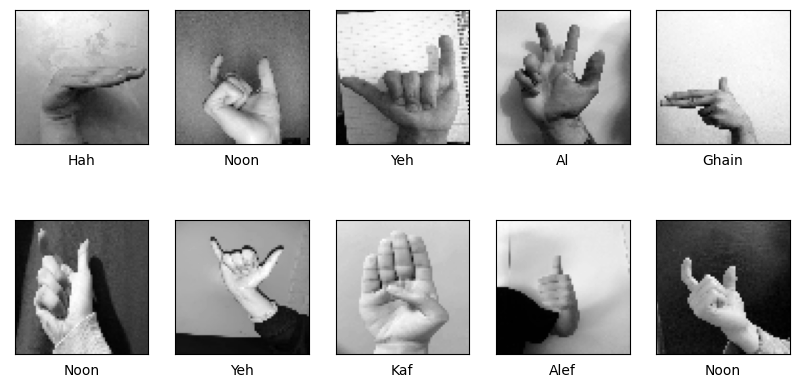

Loaded 5661 training images
(5661,)
(5661, 64, 64, 1)
['Ain' 'Ain' 'Ain' ... 'Zain' 'Zain' 'Zain']
Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images
Loaded 2500 images


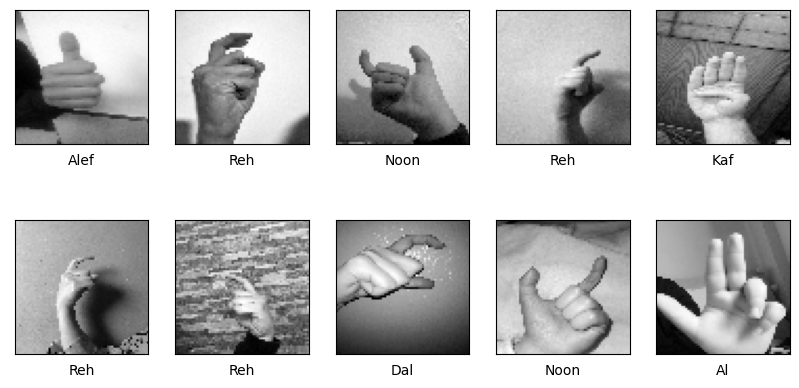

Loaded 2689 validation images
(2689,)
(2689, 64, 64, 1)
['Ain' 'Ain' 'Ain' ... 'Zain' 'Zain' 'Zain']


In [9]:
# load the training images
train_img_arrays, train_labels = load_images('images_split/training_dataset', img_width, img_height)

# plot 10 random images from the training set
import matplotlib.pyplot as plt
import random

import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    n = random.randint(0, len(train_img_arrays))
    axi.imshow(train_img_arrays[n], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=train_labels[n])
plt.show()

print('Loaded {} training images'.format(len(train_img_arrays)))
print(train_labels.shape)
print(train_img_arrays.shape)
print(train_labels)


# load the validation images
val_img_arrays, val_labels = load_images('images_split/validation_dataset', img_width, img_height)


# plot 10 random images from the validation set
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    n = random.randint(0, len(val_img_arrays))
    axi.imshow(val_img_arrays[n], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=val_labels[n])
plt.show()

print('Loaded {} validation images'.format(len(val_img_arrays)))
print(val_labels.shape)
print(val_img_arrays.shape)
print(val_labels)




In [22]:
train_img_arrays, train_labels = prepare_data(train_img_arrays, train_labels)
val_img_arrays, val_labels = prepare_data(val_img_arrays, val_labels)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# We can use He Normal for the initializer
init = 'he_normal'

# Adding a couple more layers to the model
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=init, input_shape=(img_width, img_height, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=init))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Last layer
model.add(Dense(31, activation='softmax'))

# set the learning rate for Adam to 0.01
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


1/1 [==============================] - 0s 37ms/step


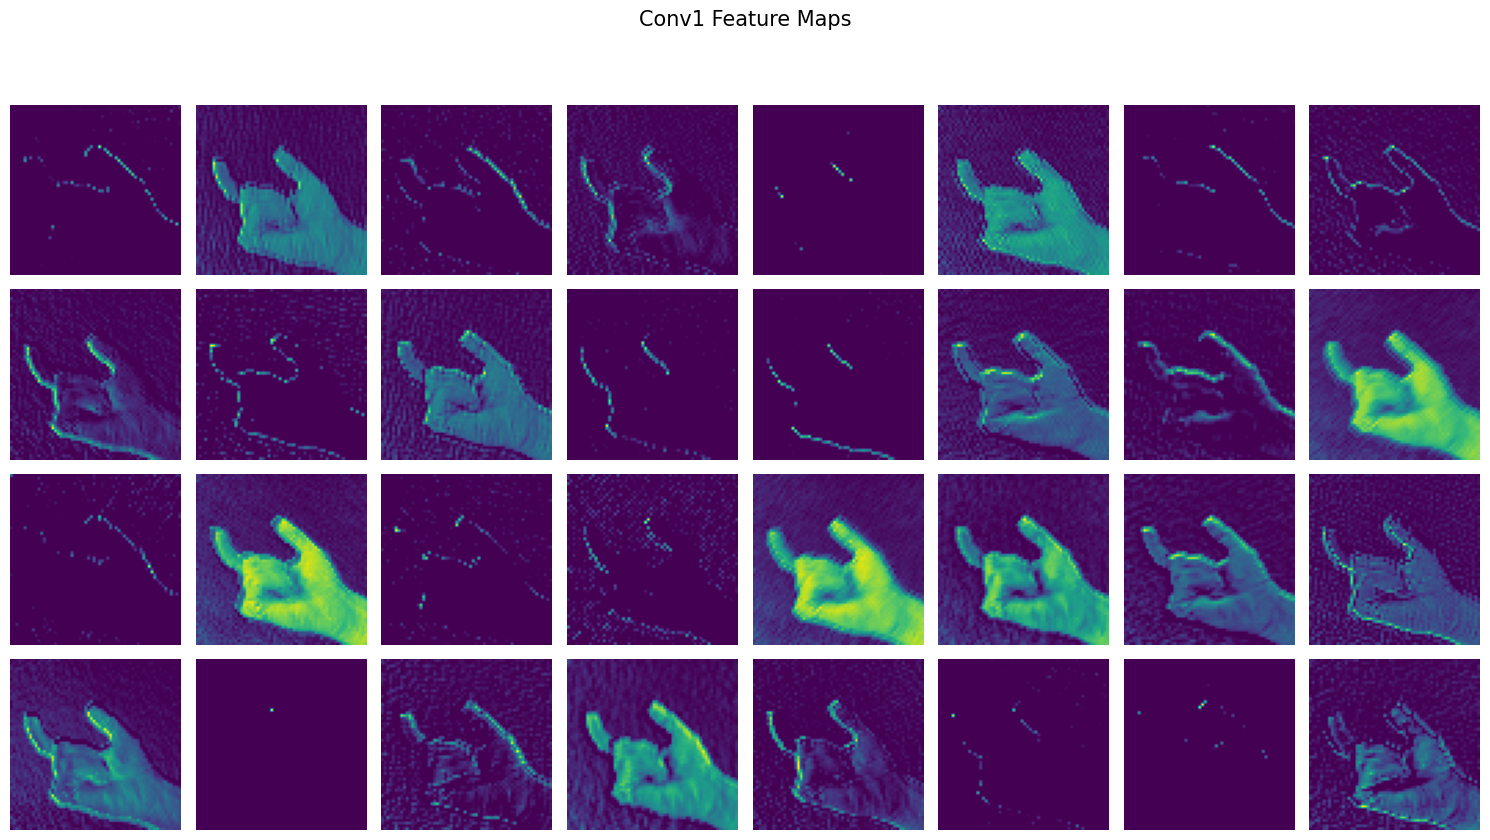

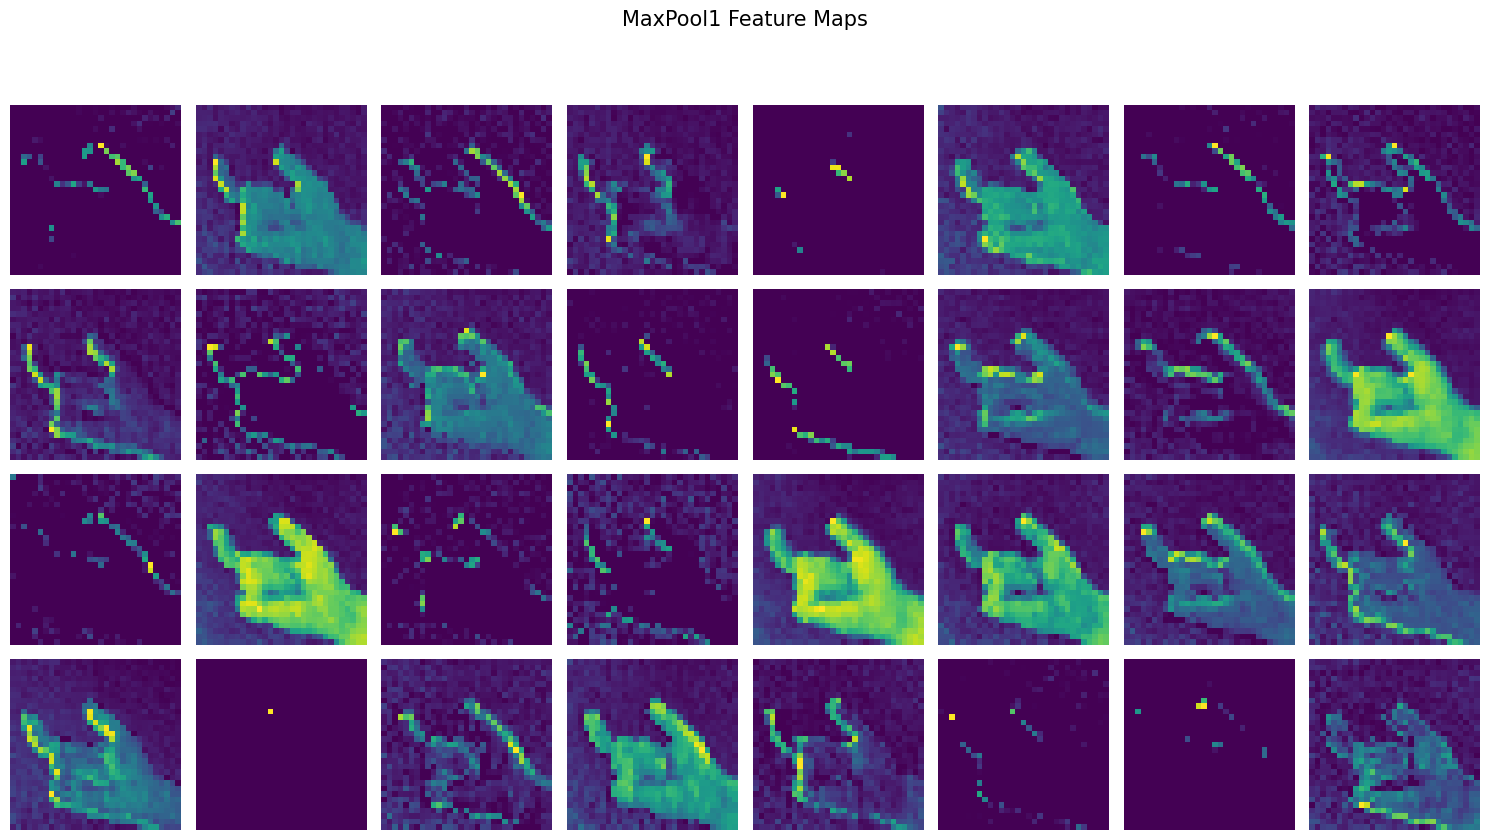

In [120]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions (replace with your values)
img_height, img_width = 64 , 64  # Replace these values with the dimensions of your input images

# Redefine model with named layers for easy access
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), name='Conv1'),
    MaxPooling2D(2, 2, name='MaxPool1'),
    Conv2D(64, (3, 3), activation='relu', name='Conv2'),
    MaxPooling2D(2, 2, name='MaxPool2'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax') # 31 is the number of classes, change this if necessary
])

# Create a new model that will output the images after Conv1 and MaxPool1
layer_outputs = [model2.get_layer('Conv1').output, model2.get_layer('MaxPool1').output]
visualize_model2 = Model(inputs=model2.input, outputs=layer_outputs)

# Load an image and reshape
img_path = "C:/Users/Lemniai/Documents/images_arabic/Noon/Noon_6.jpg"  # change this to the path of your image
image = load_img(img_path, target_size=(img_height, img_width))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Forward propagate the image through the model
feature_maps = visualize_model2.predict(image)

# The Conv1 feature maps
conv_feature_map = feature_maps[0]

# The MaxPool1 feature maps
maxpool_feature_map = feature_maps[1]

# Plot Conv1 feature maps
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        ax = axs[i, j]
        ax.imshow(conv_feature_map[0, :, :, i*8+j], cmap='viridis')
        ax.axis('off')

plt.suptitle('Conv1 Feature Maps', fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

# Plot MaxPool1 feature maps
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        ax = axs[i, j]
        ax.imshow(maxpool_feature_map[0, :, :, i*8+j], cmap='viridis')
        ax.axis('off')

plt.suptitle('MaxPool1 Feature Maps', fontsize=15, y=1.05)
plt.tight_layout()
plt.show()


In [119]:
# print the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_40 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_41 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                      

In [89]:
history = model.fit(
    x=train_img_arrays,
    y=train_labels,
    batch_size=32,
    epochs=100,
    validation_data=(val_img_arrays, val_labels),
    verbose=1
)



Epoch 1/100
177/177 [==============================] - 73s 414ms/step - loss: 3.5231 - accuracy: 0.0830 - val_loss: 3.5839 - val_accuracy: 0.0885
Epoch 2/100
177/177 [==============================] - 46s 258ms/step - loss: 2.7348 - accuracy: 0.2114 - val_loss: 2.9432 - val_accuracy: 0.2551
Epoch 3/100
177/177 [==============================] - 46s 259ms/step - loss: 2.3020 - accuracy: 0.3284 - val_loss: 3.1566 - val_accuracy: 0.1636
Epoch 4/100
177/177 [==============================] - 45s 257ms/step - loss: 1.9675 - accuracy: 0.4118 - val_loss: 2.6557 - val_accuracy: 0.2956
Epoch 5/100
177/177 [==============================] - 46s 262ms/step - loss: 1.7483 - accuracy: 0.4734 - val_loss: 1.8270 - val_accuracy: 0.4927
Epoch 6/100
177/177 [==============================] - 46s 261ms/step - loss: 1.5542 - accuracy: 0.5314 - val_loss: 1.8084 - val_accuracy: 0.5221
Epoch 7/100
177/177 [==============================] - 45s 257ms/step - loss: 1.3892 - accuracy: 0.5775 - val_loss: 1.7598 -

Epoch 57/100
177/177 [==============================] - 45s 252ms/step - loss: 0.2368 - accuracy: 0.9233 - val_loss: 1.1893 - val_accuracy: 0.8055
Epoch 58/100
177/177 [==============================] - 44s 248ms/step - loss: 0.2009 - accuracy: 0.9293 - val_loss: 1.3154 - val_accuracy: 0.8029
Epoch 59/100
177/177 [==============================] - 44s 249ms/step - loss: 0.1952 - accuracy: 0.9343 - val_loss: 1.1850 - val_accuracy: 0.8137
Epoch 60/100
177/177 [==============================] - 44s 249ms/step - loss: 0.2195 - accuracy: 0.9283 - val_loss: 3.3473 - val_accuracy: 0.6125
Epoch 61/100
177/177 [==============================] - 43s 244ms/step - loss: 0.2084 - accuracy: 0.9334 - val_loss: 1.2619 - val_accuracy: 0.8022
Epoch 62/100
177/177 [==============================] - 43s 245ms/step - loss: 0.2092 - accuracy: 0.9357 - val_loss: 1.2934 - val_accuracy: 0.7940
Epoch 63/100
177/177 [==============================] - 44s 248ms/step - loss: 0.2005 - accuracy: 0.9323 - val_loss: 1

In [90]:
# Save the model
model.save('Model_fullData_32bs_50epochs_64x64.h5')



In [37]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Lemniai\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


85/85 [==============================] - 4s 45ms/step


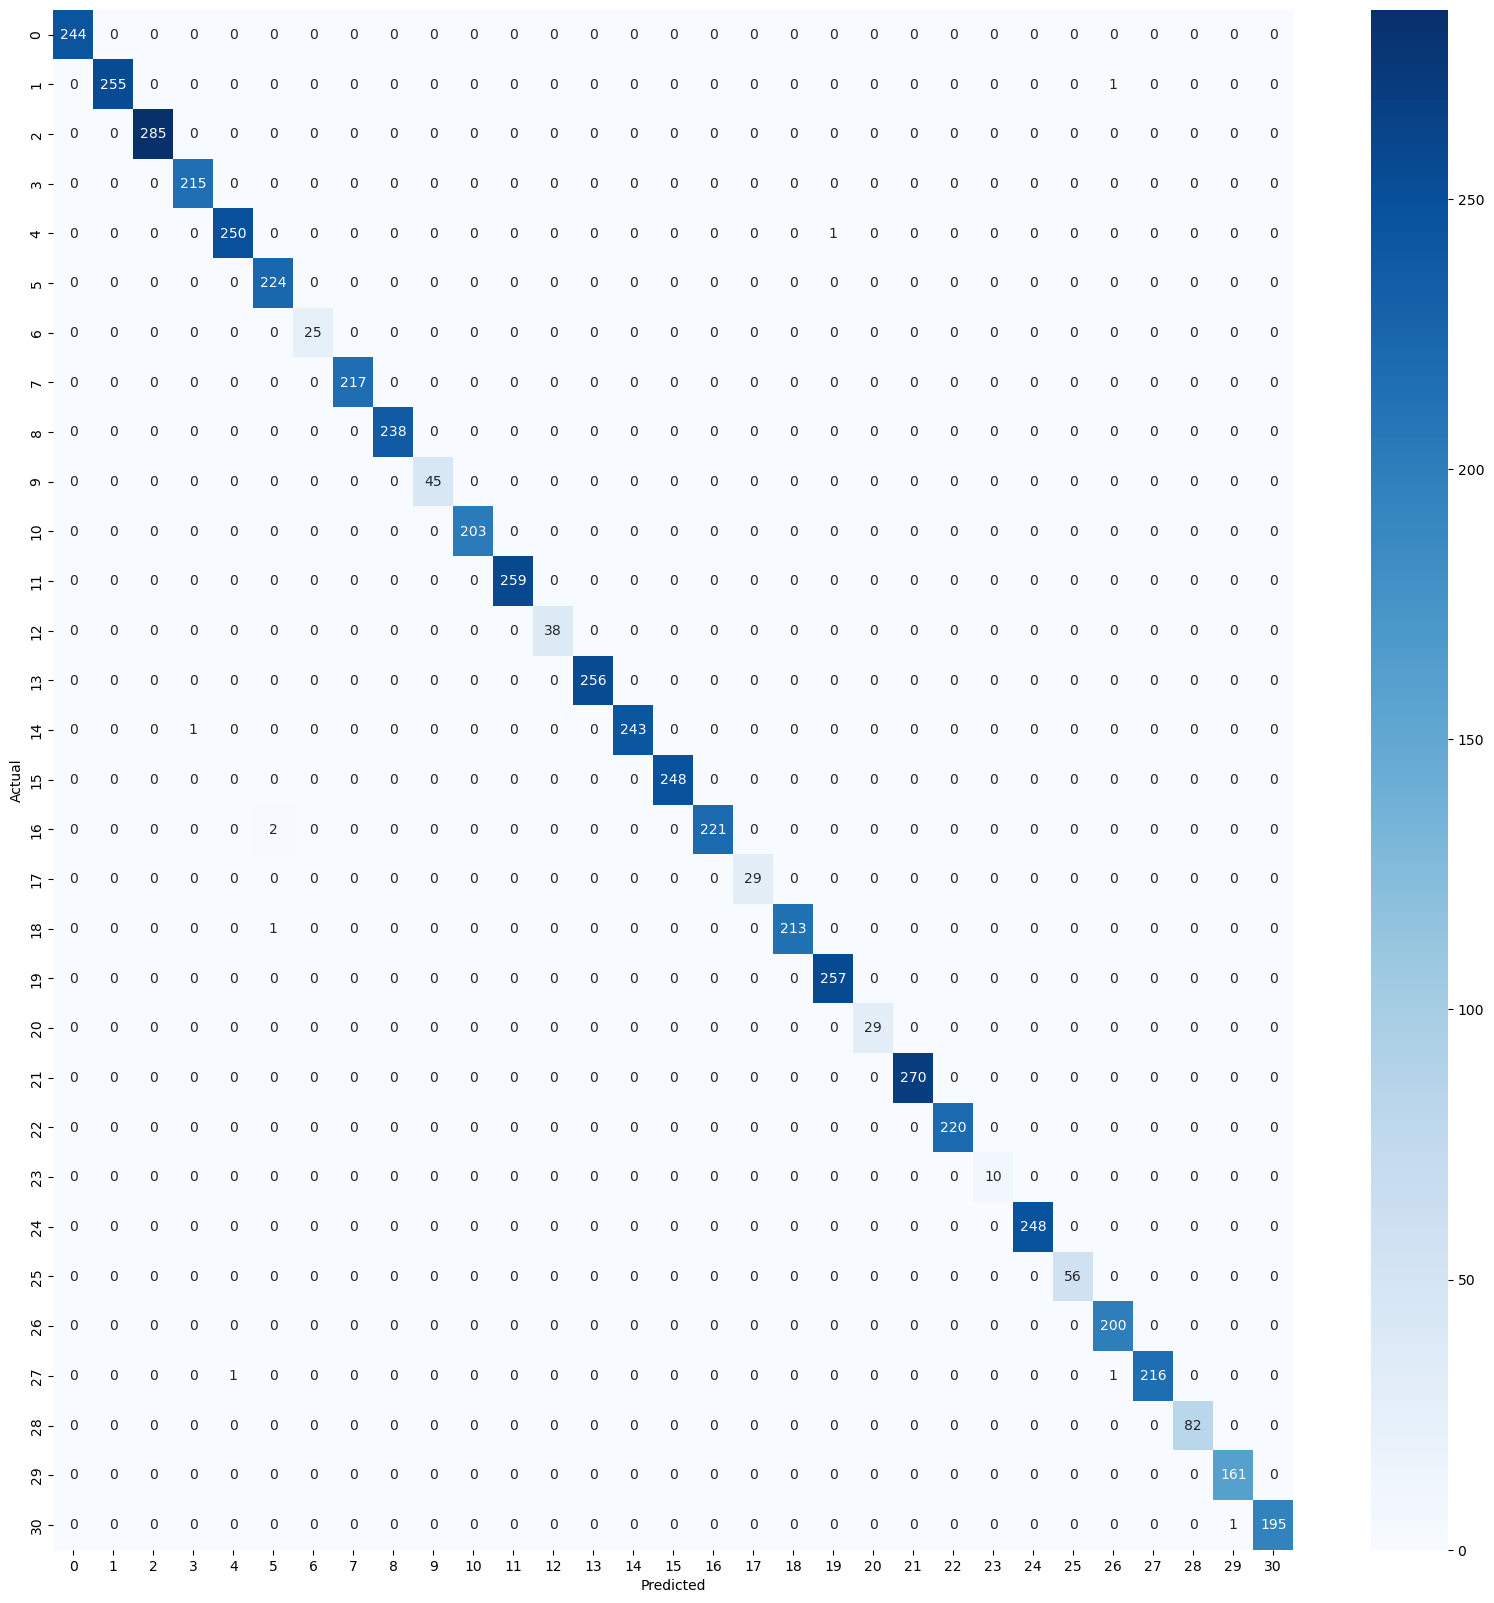

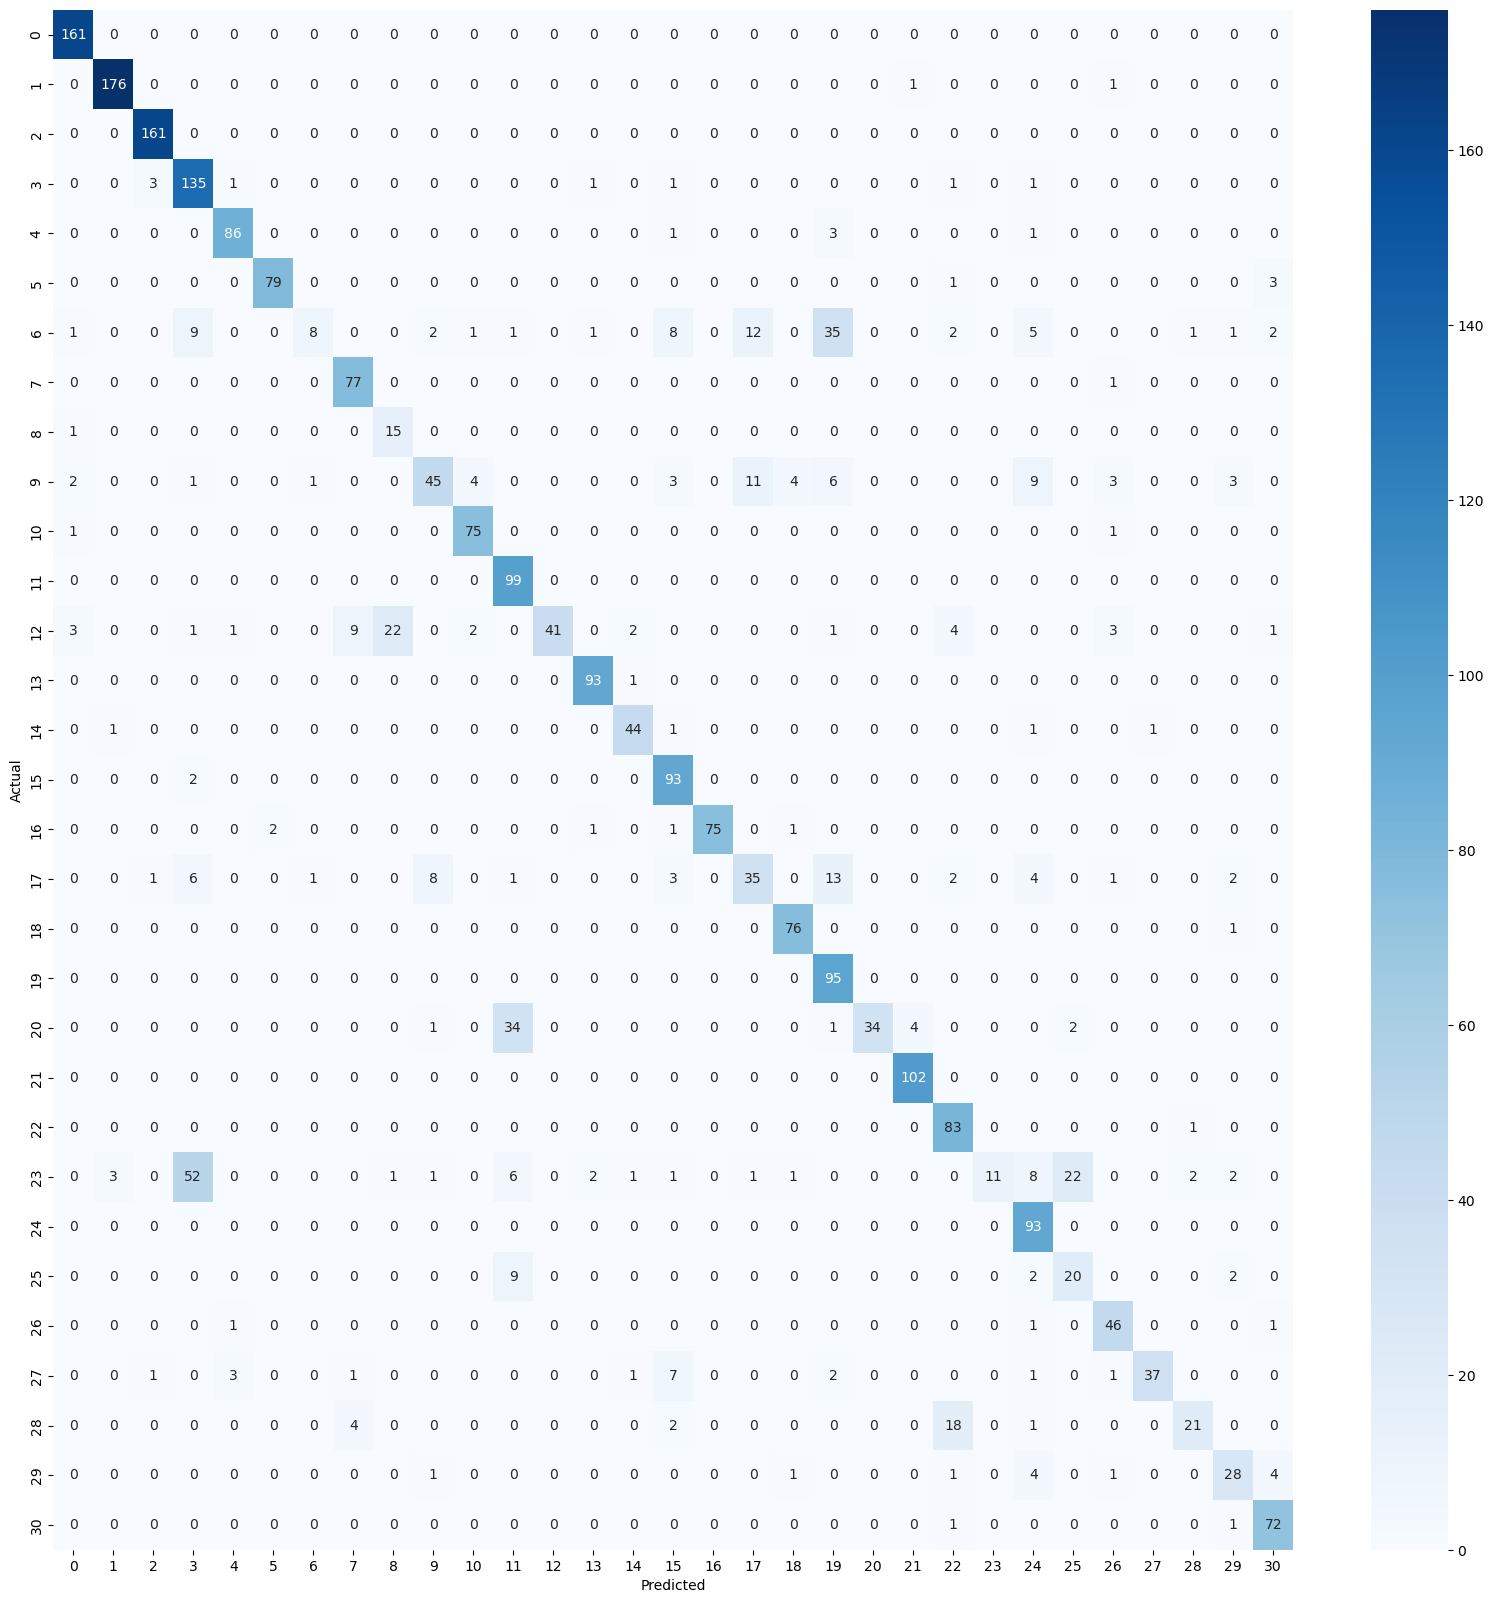

Training accuracy: 99.84%
Validation accuracy: 82.41%
Training loss: 0.14
Validation loss: 1.24


In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predictions for the training data
train_predictions = model.predict(train_img_arrays)

# get the predictions for the validation data
val_predictions = model.predict(val_img_arrays)

# get the predicted labels for the training data
train_pred_labels = np.argmax(train_predictions, axis=1)

# get the predicted labels for the validation data
val_pred_labels = np.argmax(val_predictions, axis=1)

# get the true labels for the training data
train_true_labels = np.argmax(train_labels, axis=1)

# get the true labels for the validation data
val_true_labels = np.argmax(val_labels, axis=1)

# get the confusion matrix for the training data
train_confusion_matrix = confusion_matrix(train_true_labels, train_pred_labels)

# get the confusion matrix for the validation data
val_confusion_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# plot the confusion matrix for the training data
plt.figure(figsize=(20, 20))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# plot the confusion matrix for the validation data
plt.figure(figsize=(20, 20))
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# get the training accuracy
train_accuracy = np.sum(train_pred_labels == train_true_labels) / len(train_true_labels)

# get the validation accuracy
val_accuracy = np.sum(val_pred_labels == val_true_labels) / len(val_true_labels)

# get the training loss
train_loss = history.history['loss'][-1]

# get the validation loss
val_loss = history.history['val_loss'][-1]

# print the results
print('Training accuracy: {:.2f}%'.format(train_accuracy * 100))
print('Validation accuracy: {:.2f}%'.format(val_accuracy * 100))
print('Training loss: {:.2f}'.format(train_loss))
print('Validation loss: {:.2f}'.format(val_loss))

# get the training accuracy for each class
train_class_accuracy = train_confusion_matrix.diagonal() / train_confusion_matrix.sum(axis=1)

# get the validation accuracy for each class
val_class_accuracy = val_confusion_matrix.diagonal() / val_confusion_matrix.sum(axis=1)

# get the training loss for each class
train_class_loss = train_confusion_matrix.sum(axis=1) / train_confusion_matrix.sum()

# get the validation loss for each class
val_class_loss = val_confusion_matrix.sum(axis=1) / val_confusion_matrix.sum()

# get the most common error for each class in the training data
train_class_error = np.argmax(train_confusion_matrix, axis=1)

# get the most common error for each class in the validation data
val_class_error = np.argmax(val_confusion_matrix, axis=1)


In [116]:
labels = list(range(31))

label_dict = {
    0: 'عين',
    1: 'ال',
    2: 'ألف',
    3: 'باء',
    4: 'ضاد',
    5: 'دال',
    6: 'فاء',
    7: 'غين',
    8: 'حاء',
    9: 'هاء',
    10: 'جيم',
    11: 'كاف',
    12: 'خاء',
    13: 'لا',
    14: 'لام',
    15: 'ميم',
    16: 'نون',
    17: 'قاف',
    18: 'راء',
    19: 'صاد',
    20: 'سين',
    21: 'شين',
    22: 'طاء',
    23: 'تاء',
    24: 'تاء مربوطة',
    25: 'ذال',
    26: 'ثاء',
    27: 'واو',
    28: 'ياء',
    29: 'زاي',
    30: 'زين'
}

# use label dictionary to get the names of the classes
true_labels = [label_dict[label] for label in labels]
true_train_error = [label_dict[label] for label in train_class_error]
true_val_error = [label_dict[label] for label in val_class_error]
import pandas as pd
# create a table of the results
results = pd.DataFrame({'Class': true_labels,
                        'Training accuracy': train_class_accuracy,
                        'Training loss': train_class_loss,
                        'Validation accuracy': val_class_accuracy,
                        'Validation loss': val_class_loss,
                        'Training Prediction': true_train_error,
                        'Validation Prediction': true_val_error},
                          index=labels)


# print the results
results

,Class,Training accuracy,Training loss,Validation accuracy,Validation loss,Training Prediction,Validation Prediction
0,عين,1.000000,0.043102,1.000000,0.059874,عين,عين
1,ال,0.996094,0.045222,0.988764,0.066196,ال,ال
2,ألف,1.000000,0.050344,1.000000,0.059874,ألف,ألف
3,باء,1.000000,0.037979,0.944056,0.053180,باء,باء
4,ضاد,0.996016,0.044338,0.945055,0.033842,ضاد,ضاد
5,دال,1.000000,0.039569,0.951807,0.030866,دال,دال
6,فاء,1.000000,0.004416,0.089888,0.033098,فاء,صاد
7,غين,1.000000,0.038332,0.987179,0.029007,غين,غين
8,حاء,1.000000,0.042042,0.937500,0.005950,حاء,حاء
9,هاء,1.000000,0.007949,0.489130,0.034213,هاء,هاء


In [114]:
import cv2 as cv2
import numpy as np
from tensorflow import keras
import pandas as pd

def aslr(img_path, model):
    label_dict = {
    0: 'عين',
    1: 'ال',
    2: 'ألف',
    3: 'باء',
    4: 'ضاد',
    5: 'دال',
    6: 'فاء',
    7: 'غين',
    8: 'حاء',
    9: 'هاء',
    10: 'جيم',
    11: 'كاف',
    12: 'خاء',
    13: 'لا',
    14: 'لام',
    15: 'ميم',
    16: 'نون',
    17: 'قاف',
    18: 'راء',
    19: 'صاد',
    20: 'سين',
    21: 'شين',
    22: 'طاء',
    23: 'تاء',
    24: 'تاء مربوطة',
    25: 'ذال',
    26: 'ثاء',
    27: 'واو',
    28: 'ياء',
    29: 'زاي',
    30: 'زين'
}

    # Load the image
    img = cv2.imread(img_path)

    # Check if the image was loaded successfully
    if img is None:
        print("Failed to load image:", img_path)
        return None

    # Resize the input image to match the expected input shape of the model
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=3)
    img = img.astype('float32') / 255.0

    # Make predictions using the model
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    # Get the predicted label
    predicted_label = label_dict[predicted_label]

    return predicted_label

In [115]:
aslr("C:/Users/Lemniai/Documents/images_arabic/Ain/Ain_5.jpg",model)

1/1 [==============================] - 0s 23ms/step


'عين'

In [107]:
# save the dataframes to csv files
results.to_csv('results.csv')

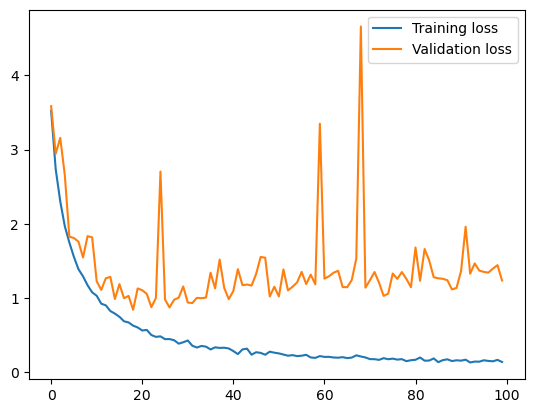

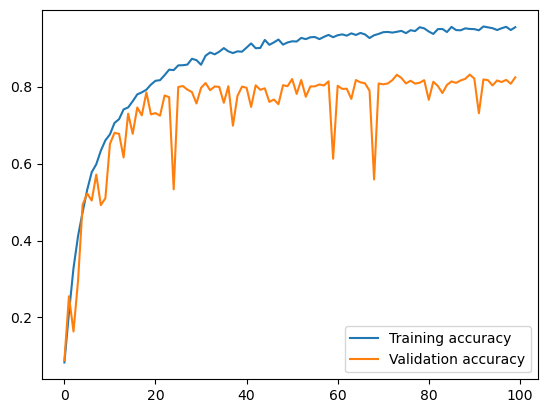

In [108]:
# plot the training and validation loss per epoch
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

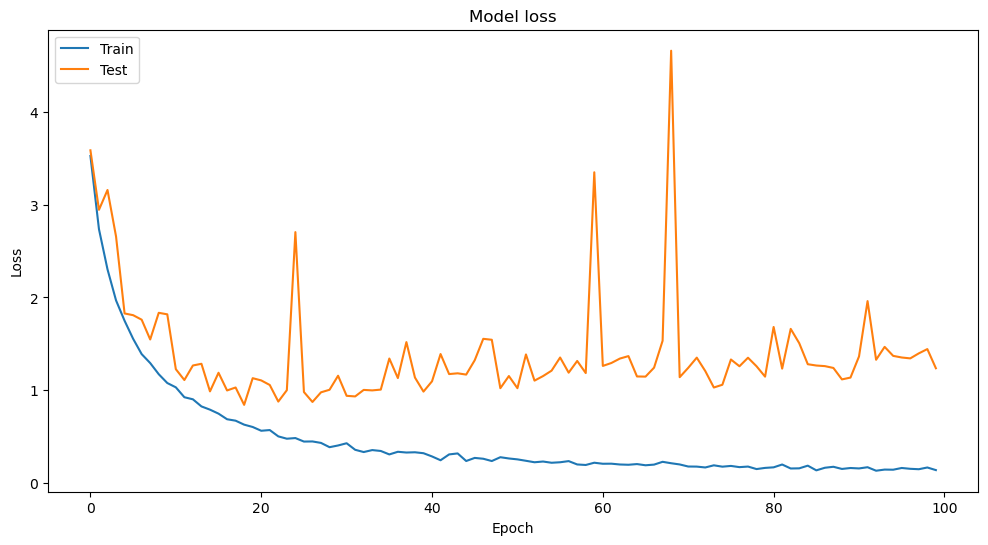

In [109]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


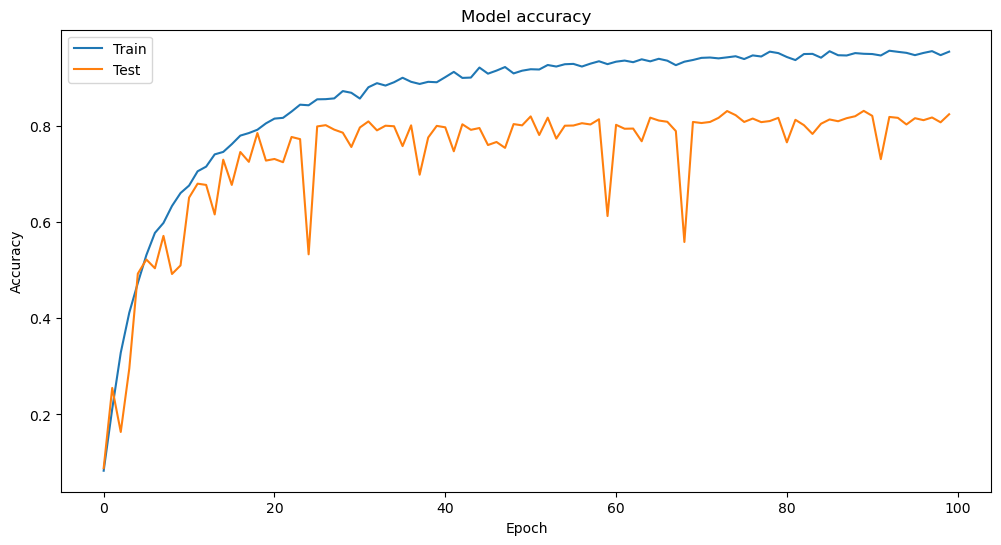

In [110]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
